Citations:</br>
Dictionary of Dictionaries: https://www.geeksforgeeks.org/python-nested-dictionary/ </br>
Most freq words: https://stackoverflow.com/questions/14500028/extracting-most-frequent-words-out-of-a-corpus-with-python </br>
Dataframe from dict: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html </br>
Cosine Similarity: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html </br>
Importing Google model: https://stackoverflow.com/questions/46433778/import-googlenews-vectors-negative300-bin </br>
https://radimrehurek.com/gensim/models/keyedvectors.html </br>

In [1]:
import os
#import spacy
import numpy as np
import pandas as pd
from collections import Counter
from nltk.probability import FreqDist
from tqdm import tqdm
from math import log
import string
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report




C:\Users\sagar\AppData\Local\Temp\ipykernel_17332\1022606234.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Part1

In [2]:
with open('brown100k.txt', 'r') as file:
    raw_text = file.read()

In [3]:
len(raw_text)

580637

In [4]:
data=raw_text.lower().split()
word_counts = FreqDist(data)
top1000=word_counts.most_common(1000)
top1000[0]

('the', 7267)

In [5]:
col=raw_text.lower().split()
unique_token=set(col)
dict_vec={}


In [6]:
for i in tqdm(top1000):
    dict_vec[i[0]]={}
    for j in range(len(data)):
        if i[0]==data[j]:
            for k in range(1,3):
                if data[j-k] in dict_vec[i[0]]:
                    dict_vec[i[0]][data[j-k]]+=1
                else:
                    dict_vec[i[0]][data[j-k]]=1
        

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 141.99it/s]


In [7]:
df=pd.DataFrame.from_dict(dict_vec, orient='index')
df2=pd.DataFrame(columns=list(set(data)-set(df.columns)), index=dict_vec.keys())
df3=pd.concat([df, df2], axis=1)

In [8]:
set(df3.index)-set(col)
    

set()

What are the dimensions of your matrix? What determines these
dimensions (i.e., why are these the dimensions)? What percentage of the
matrix’s elements are 0?

In [9]:
df3

,responsibility,of,place,took,that,presentments,charge,deserves,election,thanks,...,rimini,otis,skeet,subordinated,645acre,wolverton,perasso,elvis,dropping,klux
the,6.0,1035.0,9.0,11.0,206.0,1.0,5.0,1.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
of,1.0,37.0,4.0,1.0,34.0,NaN,10.0,NaN,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
and,1.0,135.0,2.0,2.0,9.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
to,1.0,40.0,NaN,1.0,11.0,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a,1.0,150.0,2.0,7.0,41.0,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
receive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dimentions of the df are 1000 rows × 13656 columns

In [10]:
df3.isna().sum().sum()*100/(df3.shape[0]*df3.shape[1])

99.42505125951962

99.42% of the Matrix elements are 0

In [11]:
df3=df3.fillna(0)
df3=df3.astype(int)
df3

C:\Users\sagar\AppData\Local\Temp\ipykernel_17332\3620855991.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3=df3.fillna(0)


,responsibility,of,place,took,that,presentments,charge,deserves,election,thanks,...,rimini,otis,skeet,subordinated,645acre,wolverton,perasso,elvis,dropping,klux
the,6,1035,9,11,206,1,5,1,6,1,...,0,0,0,0,0,0,0,0,0,0
of,1,37,4,1,34,0,10,0,4,1,...,0,0,0,0,0,0,0,0,0,0
and,1,135,2,2,9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
to,1,40,0,1,11,0,0,0,3,4,...,0,0,0,0,0,0,0,0,0,0
a,1,150,2,7,41,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
receive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nothing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Pick your favorite word in the vocabulary. Show the 20 closest words to
your chosen word, calculated using the cosine similarity metric. Are these
what you expected? Why or why not?

Choosing the word "the"

In [13]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    if norm_vector1 != 0 and norm_vector2 != 0:
        similarity = dot_product / (norm_vector1 * norm_vector2)
    else:
        similarity = 0  # Handle division by zero
    return similarity

In [14]:
df3.loc['the'].values
value=[]
for i in tqdm(top1000):
    if i[0]!='the':
        value.append([i[0],cosine_similarity(df3.loc['the'].values,df3.loc[i[0]].values)])

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.57it/s]


In [15]:
value.sort(key=lambda x: x[1], reverse=True)
value[:20]

[['its', 0.9099978361210391],
 ['his', 0.8915871457647584],
 ['their', 0.8892782907076743],
 ['this', 0.866736689468075],
 ['a', 0.858958551136425],
 ['an', 0.8560321006030137],
 ['all', 0.8297499773145374],
 ['our', 0.8188108728865724],
 ['these', 0.8045322417994314],
 ['such', 0.7912553308243344],
 ['those', 0.7633357874613256],
 ['any', 0.7579828146734305],
 ['her', 0.7415732271327318],
 ['washington', 0.7265564275786416],
 ['each', 0.7231005520867136],
 ['some', 0.7155915179427546],
 ['dallas', 0.712924769448125],
 ['houston', 0.711116703135719],
 ['them', 0.7105597345669267],
 ['san', 0.7003367210286724]]

I expected its, his, their.... to be there as these are similar placeholders in the semantic of the English Language. But words like dallas, washington, san were not expected. As they are proper nouns while the is an article. 

Which two words in your vocabulary are most distinct? Which are most
similar to each other? Does this make sense to you, or are these
surprising?

Runtime of above code was around 6 hours

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
temp=df3.to_numpy()
val=cosine_similarity(temp)

In [18]:
max_index = np.unravel_index(np.argmax(val), val.shape)
min_index = np.unravel_index(np.argmin(val), val.shape)

In [19]:
print('Words with highest similarity:',df3.index[max_index[0]],'&',df3.columns[max_index[0]])
print('Words which are most distinct:',df3.index[min_index[0]],'&',df3.columns[min_index[0]])

Words with highest similarity: it & interest
Words which are most distinct: i & for


### Part2

In [20]:
w_cat=np.array([1.0,1.0])
c_remote=np.array([0.0,1.0])
c_oatmeal=np.array([0.0,-1.0])
c_litter=np.array([1.0,0.0])

Plot these four vectors. You can use matplotlib or simply plot by hand (it doesn’t need to
be super exact, just label the points with their values if you’re approximating the plot).

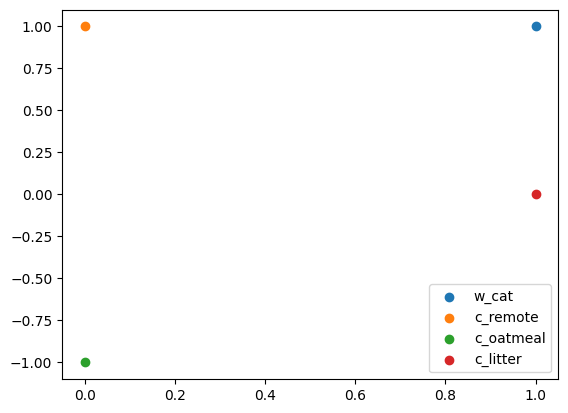

In [21]:
plt.scatter(x=1,y=1,label='w_cat')
plt.scatter(x=0,y=1,label='c_remote')
plt.scatter(x=0,y=-1,label='c_oatmeal')
plt.scatter(x=1,y=0,label='c_litter')
plt.legend()

For each of the three tuples in our training example, does the model output that they are
context pairs or not? Is the model correct?

In [22]:
from tensorflow.math import sigmoid

In [23]:
cat_remote=sigmoid(np.dot(w_cat,c_remote))
cat_oatmeal=sigmoid(np.dot(w_cat,c_oatmeal))
cat_litter=sigmoid(np.dot(w_cat,c_litter))


In [24]:
print('cat_remote:',cat_remote)
print('cat_oatmeal:',cat_oatmeal)
print('cat_litter:',cat_litter)

cat_remote: tf.Tensor(0.7310585786300049, shape=(), dtype=float64)
cat_oatmeal: tf.Tensor(0.2689414213699951, shape=(), dtype=float64)
cat_litter: tf.Tensor(0.7310585786300049, shape=(), dtype=float64)


If we take Cuttoff as 0.5, the model predits cat_remote and cat_litter as context pairs and cat_oatmeal as not a context pair. </br> 
But we know that cat & remote are not context pairs. Therefore the model is not 100% correct.

You begin to train your model to arrive at target and context word vectors that will
maximize the probability that positive examples are labeled as occurring together and
maximize the probability that negative examples are labeled as *not* occurring together.
You decide to use the loss function defined in (6.34 in SLP). What is the current loss
value?

loss=−log(σ(w_target⋅c_context))−∑ i=1 to k log(1−σ(w_target⋅c_negative_i))

In [25]:
loss=(-np.log(sigmoid(np.dot(w_cat,c_litter)))-np.log(1-sigmoid(np.dot(w_cat,c_remote)))-np.log(1-sigmoid(np.dot(w_cat,c_oatmeal))))
print('Current Loss:',loss)

Current Loss: 1.9397850625546684


You decide to perform gradient descent to update your vectors. Step through one step of
stochastic gradient descent (consider all three example tuples as one step). Set the
learning rate η = 1. What are the updated vectors? Plot them.

In [26]:
lr=1
c_litter_new=c_litter-lr*(cat_litter-1)*w_cat
c_remote_new=c_remote-lr*(cat_remote)*w_cat
c_oatmeal_new=c_oatmeal-lr*(cat_oatmeal)*w_cat
w_cat_new=w_cat-lr*((cat_litter-1)*c_litter+cat_remote*c_remote+cat_oatmeal*c_oatmeal)
print('c_litter_new:',c_litter_new)
print('c_remote_new:',c_remote_new)
print('c_oatmeal_new:',c_oatmeal_new)
print('w_cat_new:',w_cat_new)

c_litter_new: tf.Tensor([1.26894142 0.26894142], shape=(2,), dtype=float64)
c_remote_new: tf.Tensor([-0.73105858  0.26894142], shape=(2,), dtype=float64)
c_oatmeal_new: tf.Tensor([-0.26894142 -1.26894142], shape=(2,), dtype=float64)
w_cat_new: tf.Tensor([1.26894142 0.53788284], shape=(2,), dtype=float64)


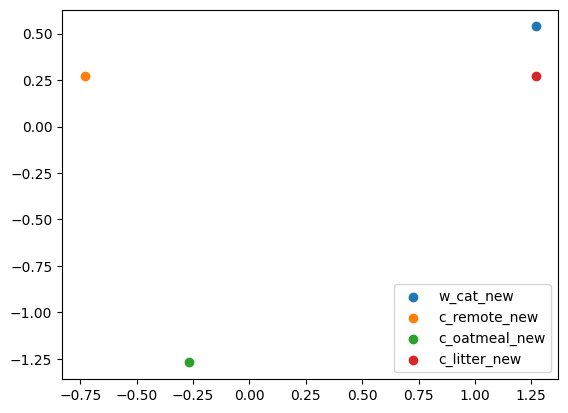

In [27]:
plt.scatter(x=w_cat_new[0],y=w_cat_new[1],label='w_cat_new')
plt.scatter(x=c_remote_new[0],y=c_remote_new[1],label='c_remote_new')
plt.scatter(x=c_oatmeal_new[0],y=c_oatmeal_new[1],label='c_oatmeal_new')
plt.scatter(x=c_litter_new[0],y=c_litter_new[1],label='c_litter_new')
plt.legend()

For each of the three tuples and the updated vectors, does the model now make the
correct prediction?

In [28]:
c_litter=c_litter_new
c_remote=c_remote_new
c_oatmeal=c_oatmeal_new
w_cat=w_cat_new
cat_remote=sigmoid(np.dot(w_cat,c_remote))
cat_oatmeal=sigmoid(np.dot(w_cat,c_oatmeal))
cat_litter=sigmoid(np.dot(w_cat,c_litter))
print('cat_remote:',cat_remote)
print('cat_oatmeal:',cat_oatmeal)
print('cat_litter:',cat_litter)

cat_remote: tf.Tensor(0.31367119441399455, shape=(), dtype=float64)
cat_oatmeal: tf.Tensor(0.26428539289602093, shape=(), dtype=float64)
cat_litter: tf.Tensor(0.8525661633589757, shape=(), dtype=float64)


If we take Cuttoff as 0.5, the model predicts </br>
cat & remote not as a context pair</br>
cat & oatmeal not as context pair</br>
cat and litter as a context pair</br>
Therefore the model does make a 100% correct prediction

What is the new loss function value?

In [29]:
loss=(-np.log(sigmoid(np.dot(w_cat,c_litter)))-np.log(1-sigmoid(np.dot(w_cat,c_remote)))-np.log(1-sigmoid(np.dot(w_cat,c_oatmeal))))
print('Current Loss:',loss)

Current Loss: 0.8428159170506122


Describe what has changed and how this will over time work to create word embeddings
that represent word similarity. Consider how the predictions, vectors, and loss have
changed.

1. The posistions of the vectors have changed.
2. Vetors that are context pairs have gotten closer to each other.
3. Loss has decreased as, incorrect predictions for non context pairs has been penalized.
4. When this is performed iteratively, the context pairs will become closer while the non context pair will become further apart from the target word. Loss will decrease till we reach the local/global minima.

### Part 3: Evaluating Word2Vec

https://code.google.com/archive/p/word2vec/downloads </br>
is broken</br>
downloading the google model using gensim.downloader

In [33]:
from gensim import models
import gensim.downloader as api

In [35]:
google_model=api.load('word2vec-google-news-300')

Describe the pre-trained vectors. What are their dimensions? What data
were they pre-trained on? How many word tokens were they pre-trained
on?

In [42]:
dimensions=google_model.vector_size
size=google_model.vectors.shape
print("Dimensions of the word vectors:", dimensions)
print('Shape:',size)


Dimensions of the word vectors: 300
Shape: (3000000, 300)


The model was pre-trained on 300 Million words and phrases

Using the same word as above, show the 20 closest words to it, using
cosine similarity. Has anything changed? Are these what you expected?
Why or why not?

In [56]:
top20_new=set([inner_list[0] for inner_list in google_model.most_similar('the',topn=20)])
top20_old=set([inner_list[0] for inner_list in value[:20]])
print(top20_new-top20_old)
print(top20_old-top20_new)


{'that', 'one', 'onthe', 'another', 'only', 'which', 'entire', 'it', 'in', 'inthe', 'fromthe', 'tothe', 'on', 'ofthe', 'however', 'The'}
{'each', 'washington', 'them', 'such', 'her', 'dallas', 'a', 'some', 'any', 'his', 'those', 'houston', 'san', 'an', 'these', 'all'}


1. As there are more words in the Google repository, we can observe that in its top 20 there are no proper nouns such as washington.
2. In the google rep we can observe that the top 20 words are semantically closer than the one we created.
3. Yes the observation and the difference is what I would expect given the difference in size of the corpus.

Which of the two embeddings seem best to you, based on what you have
observed?

The google embendings are better in my opinion as it is capuring better context given its size

### Part 3A

In [69]:
with open('analogies.txt', 'r') as file:
    raw_text2 = file.read()

section=raw_text2.split(': ')
new_dict={}
for i in section:
    if len(section)>0:
        
        temp=i.split('\n')
        new_dict[temp[0]]=temp[1:]
del new_dict['']

analogy_dict={}
for key,value in new_dict.items():
    temp2=[]
    for i in value:
        #print(i.split())
        temp=i.split()
        if len(temp)>0:
            temp2.append(temp)
    #print(temp2)
    analogy_dict[key]=temp2


In [71]:
def analogy1(t1,t2,t3):
    new_vec=google_model[t2]-google_model[t1]+google_model[t3]
    return google_model.similar_by_vector(new_vec,topn=1)

In [72]:
analogy1('Greece','Athens','Baghdad')

[('Baghdad', 0.8139322996139526)]

In [73]:
def analogy1(t1,t2,t3):
    new_vec=google_model[t2]-google_model[t1]+google_model[t3]
    return google_model.similar_by_vector(new_vec,topn=1)[0][0]

In [74]:
analogy1('Greece','Athens','Baghdad')

'Baghdad'

In [75]:
acc={}
for key,value in analogy_dict.items():
    sum=0
    iter=0
    for i in tqdm(value):
        iter+=1
        ans=analogy1(i[0],i[1],i[2])
        if ans==i[3]:
            sum+=1
    acc[key]=sum*100/iter

100%|████████████████████████████████████████████████████████████████████████████████| 870/870 [01:50<00:00,  7.85it/s]


You will test how well the vector embeddings you are working with do at
predicting the correct answer. Report your model’s accuracy by question type. How does the
model do? Do you notice patterns in what types of analogies it handles well and what types of
analogies it handles poorly?

1. the Model is not that good at predicting Majority of the categories on the Analogy tested excecpt nationality-adjective where it performs par.
2. The reason it works well on nationality-adjective is cause the words are almost identical while others the vectors(target and context word) might have different cosines as they signify different things.

In [76]:
acc

{'capital-common-countries': 35.37549407114624,
 'capital-world': 20.424403183023873,
 'currency': 7.390300230946882,
 'city-in-state': 7.90433725172274,
 'family': 34.980237154150196,
 'gram1-adjective-to-adverb': 1.7137096774193548,
 'gram2-opposite': 1.8472906403940887,
 'gram3-comparative': 37.612612612612615,
 'gram4-superlative': 20.855614973262032,
 'gram5-present-participle': 6.0606060606060606,
 'gram6-nationality-adjective': 75.73483427141964,
 'gram7-past-tense': 10.320512820512821,
 'gram8-plural': 5.03003003003003,
 'gram9-plural-verbs': 15.632183908045977}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'capital-common-countries'),
  Text(1, 0, 'capital-world'),
  Text(2, 0, 'currency'),
  Text(3, 0, 'city-in-state'),
  Text(4, 0, 'family'),
  Text(5, 0, 'gram1-adjective-to-adverb'),
  Text(6, 0, 'gram2-opposite'),
  Text(7, 0, 'gram3-comparative'),
  Text(8, 0, 'gram4-superlative'),
  Text(9, 0, 'gram5-present-participle'),
  Text(10, 0, 'gram6-nationality-adjective'),
  Text(11, 0, 'gram7-past-tense'),
  Text(12, 0, 'gram8-plural'),
  Text(13, 0, 'gram9-plural-verbs')])

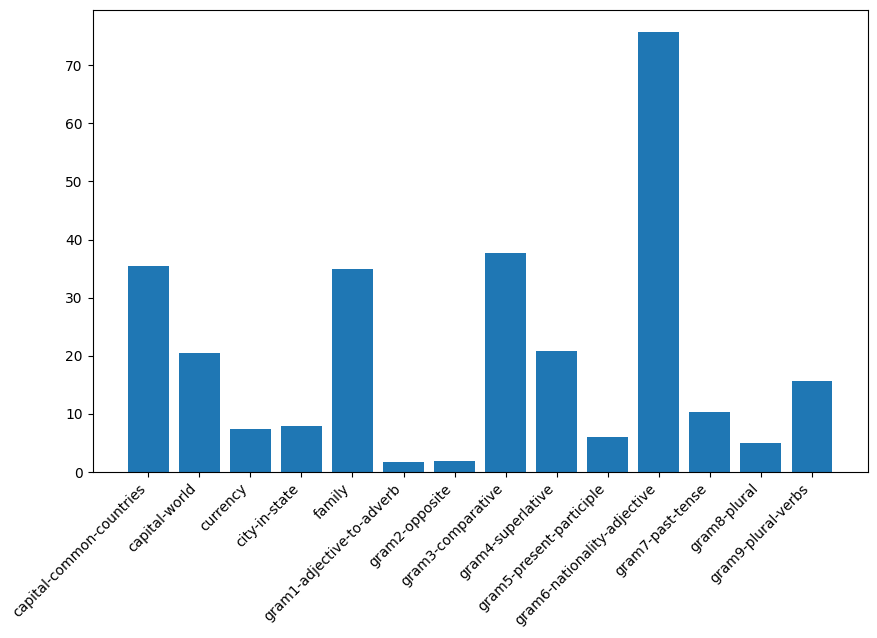

In [94]:
keys=list(acc.keys())
values=list(acc.values())
plt.figure(figsize=(10, 6))
plt.bar(keys,values)
plt.xticks(rotation=45, ha='right')

### Part 3B

In [97]:
with open('toefl.txt', 'r') as file:
    raw_text3 = file.read()
section=raw_text3.split('\n')
tof=[]
for i in section:
    temp=i.split()
    tof.append(temp)


In [98]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    if norm_vector1 != 0 and norm_vector2 != 0:
        similarity = dot_product / (norm_vector1 * norm_vector2)
    else:
        similarity = 0  # Handle division by zero
    return similarity

In [100]:
def tof_similarity(vec,words):
    max=0
    temp=''
    for i in words:
        v=cosine_similarity(google_model[vec],google_model[i])
        if v>max:
            max=v
            temp=i
    return temp

In [103]:
tof_similarity('enormously',['tremendously','appropriately'])

'tremendously'

You will write code that outputs the predicted answer for a given question. It will do so by
calculating the cosine similarity between the target word and each of the four choices and
outputting the word that has the highest cosine similarity

In [112]:
cnt=0
iter=0
for i in tof:
    iter+=1
    if i[0]=='tranquillity':
        continue
    k=tof_similarity(i[0],i[1:])
    print('Value:',i[0],'Expected:',i[1],'Returned:',k)
    if k==i[1]:
        cnt+=1
    

Value: enormously Expected: tremendously Returned: tremendously
Value: provision Expected: stipulation Returned: stipulation
Value: haphazardly Expected: randomly Returned: randomly
Value: prominent Expected: conspicuous Returned: conspicuous
Value: zenith Expected: pinnacle Returned: pinnacle
Value: flaw Expected: imperfect Returned: imperfect
Value: urgently Expected: desperately Returned: desperately
Value: consume Expected: eat Returned: eat
Value: advent Expected: come Returned: stability
Value: concisely Expected: succinctly Returned: succinctly
Value: salute Expected: greet Returned: ceremony
Value: solitary Expected: alone Returned: restless
Value: hasten Expected: accelerate Returned: accelerate
Value: perseverance Expected: endurance Returned: generosity
Value: fanciful Expected: imaginative Returned: imaginative
Value: show Expected: demonstrate Returned: demonstrate
Value: constantly Expected: continually Returned: continually
Value: issue Expected: subject Returned: subjec

Report your overall accuracy. How does this compare to
chance performance (i.e., the performance you’d expect if the model just chose an answer at
random)? Are you impressed with the performance? Do you notice any patterns in what types of
questions your model answers correctly or not? (It’s okay if you do not, but say so).

In [115]:
print('Accuracy is:',cnt*100/iter)

Accuracy is: 82.5


1. The Overall accuracy is 82.5, would be ~84% but as tranquillity does not exist in the courpus that the model was built on.
2. The Chance performce would be around 25% for each row as the result of one row is independant of the other.
3. The performance is preety good as the model is able to answer a standardized Language examination with 82.5% accuracy without being specifically trained to serve this purpose.
4. The reasoning behind this is as synonyms are logically supposed to have colse vectors as they would be used in a similar context.
5. The model answers questions where the target and expected context words are used synonymsly in general daya to day.
6. The model answers questions incorrectly where the target varai

I spent over 20 hours on this assignment, the main reason being allocation of Ram to run the codes, due to high utilization of RAM earlier 8GB the code use to crash often and I had to restart from the begining. Only after I upgraded my RAM to 16 that I was able to successfully continue working on the code.